In [15]:
import struct
import numpy as np 
import matplotlib.pyplot as plt
fileName = '../LeNet-5/model.dat'
with open(fileName, mode='rb') as file: # b is important -> binary
    fileContent = file.read()

# print(len(fileContent))
# struct.unpack("dddd", fileContent[:32])
# All = struct.unpack("d" * (51902*8 // 8), fileContent[0:51902*8])
marker = 0; #variable to keep track of file reading
W0_1 = struct.unpack("d" * (300*8 // 8), fileContent[0:300*8]);marker = 300*8;  # 1st Weights Layer: 150 weights, 8 bytes each (double type)
W2_3 = struct.unpack("d" * (36000*8 // 8), fileContent[marker:36000*8+marker]); marker+=36000*8  # 2nd Weights Layer: 2400 weights, 8 bytes each (double type)
W4_5 = struct.unpack("d" * (360000*8 // 8), fileContent[marker:360000*8+marker]); marker+=360000*8  # 3rd Weights Layer: 48000 weights, 8 bytes each (double type)
W5_6 = struct.unpack("d" * (1200*8 // 8), fileContent[marker:1200*8+marker]); marker+=1200*8 # Final Weights Layer: 1200 weights, 8 bytes each (double type)
B0_1 = struct.unpack("d" * (12*8 // 8), fileContent[marker:12*8+marker]); marker+=12*8 # 1st Bias layer: 6 weights, 8 bytes each (double type)
B2_3 = struct.unpack("d" * (120*8 // 8), fileContent[marker:120*8+marker]);  marker+=120*8# 2nd Bias layer: 16 weights, 8 bytes each (double type)
B4_5 = struct.unpack("d" * (120*8 // 8), fileContent[marker:120*8+marker]);  marker+=120*8# 3rd Bias layer: 120 weights, 8 bytes each (double type)
B5_6 = struct.unpack("d" * (10*8 // 8), fileContent[marker:10*8+marker]); marker+=10*8 # Output Bias layer: 10 weights, 8 bytes each (double type)

W4_5_arr = np.array(W4_5) #This is the weights layer we'll be working with
W4_5_mat = W4_5_arr.reshape(120,120,5,5)

W4_5_mat.shape

(120, 120, 5, 5)

In [26]:
W4_5_mat_reshape = np.transpose(W4_5_mat,axes=(3,2,0,1)) #target layer weights

def performSVD(A,k): #     k= how many singular values to keep
    U,Dvect,Vh = np.linalg.svd(A)
    D = np.zeros(U.shape)
    for x in range(0,Dvect.shape[0]):
        for y in range(0,Dvect.shape[1]):
            D[x,y,:,:] = np.diag(Dvect[x,y,:]) #D default is a vector, turn it into an array
    print('Before SVD array sizes:    U : ',U.shape,'    D : ',D.shape,'     V_h : ',Vh.shape)
    
    U_prime  = U[:,:,:,0:k] #keep only leftmost k columns
    D_prime  = D[:,:,0:k,0:k] #keep only leftmost k columns and topmost k rows
    Vh_prime =Vh[:,:,0:k,:] #keep only topmost k rows
#     U_prime  = U[:,0:k] #keep only leftmost k columns
#     D_prime  = D[:,0:k] #keep only leftmost k columns <---- for 2x2
#     Vh_prime =Vh[0:k,:] #keep only topmost k rows
    print(" After SVD array sizes:    U': ",U_prime.shape, "    D': ",D_prime.shape,"     V_h': ",Vh_prime.shape)
    
#     print(U_prime)
#     print(D_prime)
#     print(Vh_prime)
    
    DVh = np.matmul(D_prime,Vh_prime)
    print('\nD*Vh size: ',DVh.shape)
    out = dict();  
    out["U'"] = U_prime
    out["D'*V_h'"]   = DVh
    out["Original_Singular_Values"] = Dvect
    
    return out
x = performSVD(W4_5_mat_reshape,80) #returns x as a two element dictionary
print(x["U'"].shape)
print(x["D'*V_h'"].shape)


Before SVD array sizes:    U :  (5, 5, 120, 120)     D :  (5, 5, 120, 120)      V_h :  (5, 5, 120, 120)
 After SVD array sizes:    U':  (5, 5, 120, 80)     D':  (5, 5, 80, 80)      V_h':  (5, 5, 80, 120)

D*Vh size:  (5, 5, 80, 120)
(5, 5, 120, 80)
(5, 5, 80, 120)


(120,)


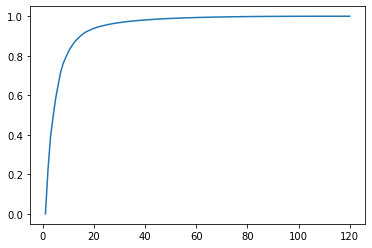

[2.21699079e-01 1.69428700e-01 9.99867446e-02 9.27924303e-02
 6.97305222e-02 6.61023014e-02 4.35641084e-02 2.93174204e-02
 2.85469282e-02 2.20532220e-02 1.97471871e-02 1.57340895e-02
 1.27069660e-02 1.22293849e-02 9.81748483e-03 8.12031772e-03
 6.06738749e-03 5.92097228e-03 5.02258034e-03 4.50193544e-03
 4.07657299e-03 3.27113751e-03 3.22200625e-03 2.90604295e-03
 2.72747710e-03 2.48734091e-03 2.32639817e-03 1.93799868e-03
 1.84485613e-03 1.76805204e-03 1.73956586e-03 1.48815093e-03
 1.41192644e-03 1.31923479e-03 1.21396543e-03 1.20340159e-03
 1.12646627e-03 1.08467539e-03 9.62790222e-04 9.29254039e-04
 8.97604086e-04 8.50662969e-04 8.31329371e-04 7.66354988e-04
 7.42246830e-04 7.22312665e-04 6.58089017e-04 6.24807874e-04
 5.81175449e-04 5.74071338e-04 5.44136647e-04 4.98665131e-04
 4.85774090e-04 4.49332392e-04 4.43358400e-04 4.29948059e-04
 4.18212830e-04 4.03970356e-04 3.83762787e-04 3.73479466e-04
 3.44594639e-04 3.28540322e-04 3.15527808e-04 3.09960647e-04
 2.97311644e-04 2.729628

In [30]:
#plot singular values (cumulative summation)

ypoints = np.zeros(120)
singvals = x["Original_Singular_Values"]
singvals = singvals[0,0,:]
singvals = 1/np.sum(singvals)*singvals
print(singvals.shape)
for i in range(0,120):
    ypoints[i] = np.sum(singvals[0:i])
xpoints = np.array(range(1,121))


plt.plot(xpoints, ypoints)
plt.show()
print(singvals)